<h2>Importar librerias<h2>

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score

<h2>Importar CSV Train<h2>

In [2]:
train_dummies = pd.read_csv("output/train_clean.csv",index_col=0)
train_dummies.head()

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.12,61.6,59.0,6.67,6.63,4.10,5363,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1.14,60.0,54.0,6.74,6.97,4.11,5593,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0.90,60.3,63.0,6.12,6.22,3.72,3534,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0.71,61.9,54.0,5.74,5.76,3.56,3212,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0.34,60.0,62.0,4.51,4.55,2.72,447,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
train_dummies.drop(["id"], axis = 'columns', inplace=True)

<h2>Separar columnas<h2>

In [4]:
columnas = [a for a in train_dummies.columns if a not in ["price"]]
X = train_dummies[columnas]
y = train_dummies["price"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32364, 26) (8091, 26) (32364,) (8091,)


In [6]:
model = HistGradientBoostingRegressor(max_iter=850, max_depth=None,
                                      min_samples_leaf=35, validation_fraction=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<h2>Métricas<h2>

In [14]:
print("R2_score",r2_score(y_test, y_pred))
print("Mean squared error",mean_squared_error(y_test, y_pred)**.5)
print("Mean absolute error",mean_absolute_error(y_test, y_pred))
print("explained variance score",explained_variance_score(y_test, y_pred))

R2_score 0.9795876891565237
Mean squared error 581.8007314368067
Mean absolute error 303.3389528566118
explained variance score 0.9795953219248649


In [15]:
scores = cross_val_score(model,X,y, cv=10)
print(np.mean(scores))

0.9800925585775719


<h2>Entrenamos todo el modelo al 100%<h2>

In [7]:
model.fit(X, y)

HistGradientBoostingRegressor(max_iter=850, min_samples_leaf=35)

<h2>Comparación de el Grand Truht y el y_train<h2>

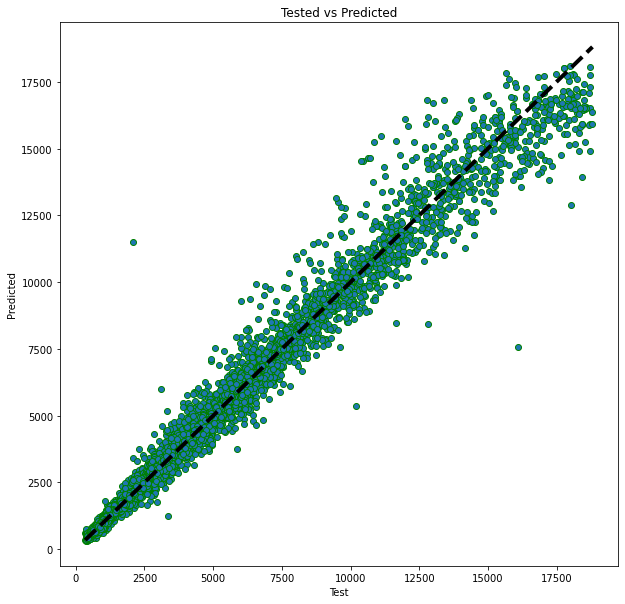

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, y_pred, edgecolors='green')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Test')
ax.set_ylabel('Predicted')
ax.set_title("Tested vs Predicted")
plt.show()

<h1>Test dataset<h1>

In [10]:
test_dummies = pd.read_csv('output/test_clean.csv',index_col=0)
test_dummies.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,0.33,62.0,58.0,4.44,4.46,2.76,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,1.21,62.4,58.0,6.77,6.83,4.24,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.06,59.3,60.0,6.64,6.71,3.96,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.36,61.4,57.0,4.64,4.61,2.54,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0.70,62.3,54.0,5.67,5.72,3.55,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
pd.get_dummies(test_dummies)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,0.33,62.0,58.0,4.44,4.46,2.76,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,1.21,62.4,58.0,6.77,6.83,4.24,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.06,59.3,60.0,6.64,6.71,3.96,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.36,61.4,57.0,4.64,4.61,2.54,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0.70,62.3,54.0,5.67,5.72,3.55,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,2.04,61.9,60.0,8.15,8.11,5.03,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
13481,0.31,61.7,55.0,4.37,4.39,2.70,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
13482,0.52,62.0,56.0,5.14,5.18,3.20,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


<h2>Predecir con el test<h2>

In [22]:
model_test=model.predict(test_dummies)

<h2>Exportar Csv<h2>

In [23]:
HistGBR_test=pd.DataFrame(model_test).reset_index().rename(columns={"index":"id",0:"price"})

In [24]:
HistGBR_test.to_csv("output/HistGBR_test.csv",index=False)